In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

1.559433849105318 -174.05830593966135
79.91307622433914 120.19643253365939
-13.44958540558514 -119.2182101793843
65.72496249016072 129.3378617130366
-17.041371212221904 -154.79753976724763
26.01113365794123 -0.23783360646908136
-18.156719101276863 55.92614685497037
-32.985785990337 -141.02601621405537
64.98710316698126 -55.462933665721934
-61.13463418688177 26.365106196778754
-9.606541509820772 62.34184078060352
-49.9644116860945 22.50051511595217
-14.45394008070042 -171.7722001322914
-38.170385630673735 -2.226331197487241
-3.805212748175123 -164.49856185726387
-67.8868657319243 80.36611701680874
-13.248217224031805 -139.0152349535565
-49.686812067583 -24.330486410720027
38.016175878021926 34.56572515833341
13.537008660824156 -16.112024531229537
-54.4621203232478 -84.20973160804341
20.44723501580347 128.64052622086933
-40.59795591339663 109.36547280095311
75.03991362439953 -65.20273664621939
38.228800513080955 -37.720554942678234
29.1958276459345 -8.305703290788045
30.872886245111914 1

-74.46729248734856 116.11039973076834
1.8212955622845044 86.10005510315153
-78.7707327192107 -22.22311639304567
17.20331044951365 -126.10779475038782
-50.60079172753573 -46.76682588859421
51.701565488202505 -74.58804813539686
-44.20082393919093 124.59108036234971
11.361675992519352 129.83910916390937
-72.59442315772836 83.92935395841761
85.5083398977267 -140.08746033149998
-20.411713571355634 15.62884317650483
29.298233285793614 -11.778156963974084
-28.524679620447216 124.31148269781141
-7.974216154396899 -149.43401610975843
-27.88478054829792 60.881545324266824
-5.366049719057699 -49.92707161864152
26.396088234545473 -14.878600341493296
-5.520786795337088 48.04149632021881
27.958258970800074 -133.59238067319905
32.72073160829639 -144.230481412689
-75.35071003836671 96.39892895933491
45.41480584295596 51.38636322498587
43.84663306343663 -159.08317816058383
-74.26176025572566 94.24016673435654
-24.96922189316132 111.35432670968419
10.118506721734803 14.661546286791435
0.789303459411471 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set the numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | batagay-alyta
Processing Record 5 of Set 1 | vaitape
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | grand baie
Processing Record 8 of Set 1 | maniitsoq
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | saleilua
City not found. Skipping...
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | nigde
Processing Record 19 of Set 1 | kerewan
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | 

Processing Record 37 of Set 4 | jamestown
Processing Record 38 of Set 4 | san vicente
Processing Record 39 of Set 4 | takoradi
Processing Record 40 of Set 4 | alekseyevka
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | chinchani
Processing Record 44 of Set 4 | maragogi
Processing Record 45 of Set 4 | bastia
Processing Record 46 of Set 4 | labutta
City not found. Skipping...
Processing Record 47 of Set 4 | adwa
Processing Record 48 of Set 4 | satitoa
City not found. Skipping...
Processing Record 49 of Set 4 | lubango
Processing Record 50 of Set 4 | morgan city
Processing Record 1 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 2 of Set 5 | gull lake
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | netivot
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | salima
Processing Record 8 of Set 5 | talnakh
Processing 

Processing Record 30 of Set 8 | yerofey pavlovich
Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | qingdao
Processing Record 33 of Set 8 | ferrol
Processing Record 34 of Set 8 | botucatu
Processing Record 35 of Set 8 | tomakivka
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | puntarenas
Processing Record 39 of Set 8 | ust-ishim
Processing Record 40 of Set 8 | puerto suarez
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | ilhabela
Processing Record 44 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 45 of Set 8 | srednekolymsk
Processing Record 46 of Set 8 | junin
Processing Record 47 of Set 8 | valentin gomez farias
Processing Record 48 of Set 8 | santa isabel do rio negro
Processing Record 49 of Set 8 | hirado
Processing Record 50 of Set 8 | san policarpo
Processing Record 1 of Set 9 | pryazha
Processing Record 2 

Processing Record 17 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 18 of Set 12 | bukama
Processing Record 19 of Set 12 | paita
Processing Record 20 of Set 12 | maltahohe
Processing Record 21 of Set 12 | fare
Processing Record 22 of Set 12 | matata
Processing Record 23 of Set 12 | areosa
Processing Record 24 of Set 12 | tidore
City not found. Skipping...
Processing Record 25 of Set 12 | riachao das neves
Processing Record 26 of Set 12 | jiblah
Processing Record 27 of Set 12 | sampit
Processing Record 28 of Set 12 | asayita
City not found. Skipping...
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | mocuba
Processing Record 31 of Set 12 | huangzhou
Processing Record 32 of Set 12 | alberdi
Processing Record 33 of Set 12 | yangjiang
Processing Record 34 of Set 12 | grootfontein
Processing Record 35 of Set 12 | menongue
Processing Record 36 of Set 12 | kiunga
Processing Record 37 of Set 12 | vardo
Processing Record 38 of Set 12 | aquiraz

In [11]:
len(city_data)

575

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,14.27,99,72,4.36,RU,2022-05-31 16:07:44
1,Rikitea,-23.1203,-134.9692,75.25,78,78,8.93,PF,2022-05-31 16:07:44
2,Batagay-Alyta,67.8006,130.4114,34.54,98,100,2.42,RU,2022-05-31 16:07:44
3,Vaitape,-16.5167,-151.7500,79.52,70,62,10.96,PF,2022-05-31 16:07:45
4,Adrar,20.5022,-10.0711,100.51,12,100,16.87,MR,2022-05-31 16:07:45
5,Grand Baie,-20.0182,57.5802,74.44,62,3,7.00,MU,2022-05-31 16:07:45
6,Maniitsoq,65.4167,-52.9000,42.37,66,0,13.91,GL,2022-05-31 16:07:46
7,Kruisfontein,-34.0033,24.7314,56.88,67,26,17.11,ZA,2022-05-31 16:07:46
8,Victoria,22.2855,114.1577,84.38,86,95,8.01,HK,2022-05-31 16:07:19
9,Bredasdorp,-34.5322,20.0403,55.63,62,79,9.22,ZA,2022-05-31 16:07:47


In [13]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-31 16:07:44,71.9167,114.0833,14.27,99,72,4.36
1,Rikitea,PF,2022-05-31 16:07:44,-23.1203,-134.9692,75.25,78,78,8.93
2,Batagay-Alyta,RU,2022-05-31 16:07:44,67.8006,130.4114,34.54,98,100,2.42
3,Vaitape,PF,2022-05-31 16:07:45,-16.5167,-151.7500,79.52,70,62,10.96
4,Adrar,MR,2022-05-31 16:07:45,20.5022,-10.0711,100.51,12,100,16.87
5,Grand Baie,MU,2022-05-31 16:07:45,-20.0182,57.5802,74.44,62,3,7.00
6,Maniitsoq,GL,2022-05-31 16:07:46,65.4167,-52.9000,42.37,66,0,13.91
7,Kruisfontein,ZA,2022-05-31 16:07:46,-34.0033,24.7314,56.88,67,26,17.11
8,Victoria,HK,2022-05-31 16:07:19,22.2855,114.1577,84.38,86,95,8.01
9,Bredasdorp,ZA,2022-05-31 16:07:47,-34.5322,20.0403,55.63,62,79,9.22


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

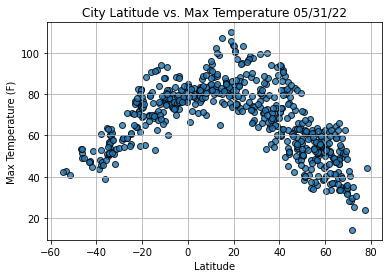

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

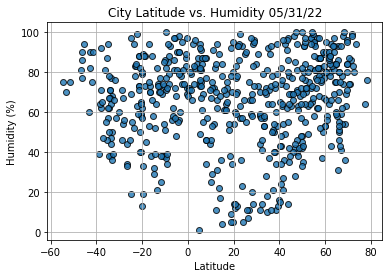

In [24]:
# Build the scatter plot for latitude vs. humdity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

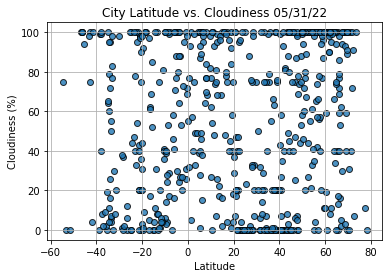

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

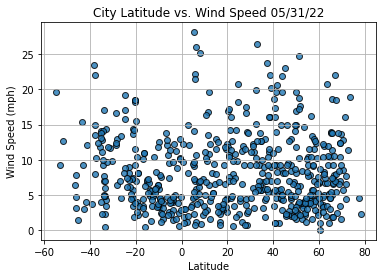

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Locating certain city within dataframe.
index13 = city_data_df.loc[13]
index13

City              Arraial Do Cabo
Country                        BR
Date          2022-05-31 16:07:48
Lat                      -22.9661
Lng                      -42.0278
Max Temp                    76.86
Humidity                       83
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [30]:
# City's lat >= 0 T or F.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
570     True
571     True
572     True
573     True
574    False
Name: Lat, Length: 575, dtype: bool

In [31]:
# Find cities in northern hemisphere.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-31 16:07:44,71.9167,114.0833,14.27,99,72,4.36
2,Batagay-Alyta,RU,2022-05-31 16:07:44,67.8006,130.4114,34.54,98,100,2.42
4,Adrar,MR,2022-05-31 16:07:45,20.5022,-10.0711,100.51,12,100,16.87
6,Maniitsoq,GL,2022-05-31 16:07:46,65.4167,-52.9000,42.37,66,0,13.91
8,Victoria,HK,2022-05-31 16:07:19,22.2855,114.1577,84.38,86,95,8.01


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

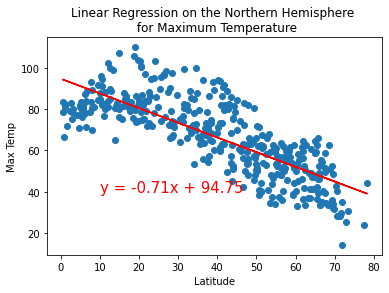

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

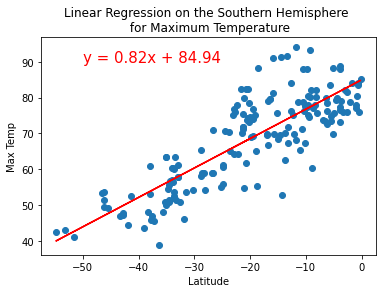

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

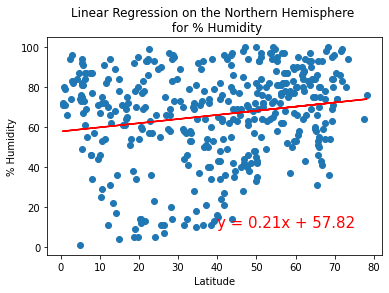

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

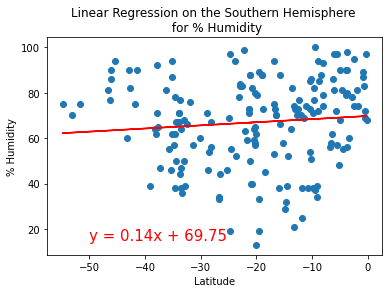

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

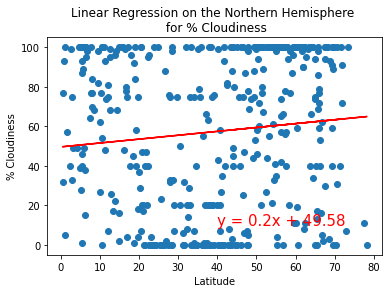

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

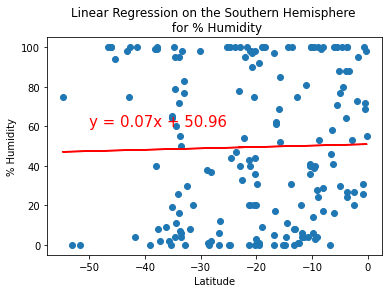

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,60))

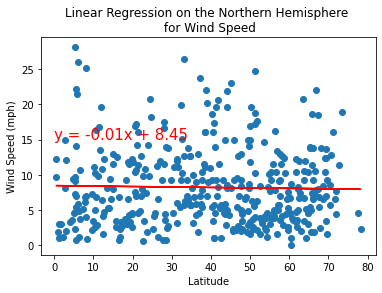

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,15))

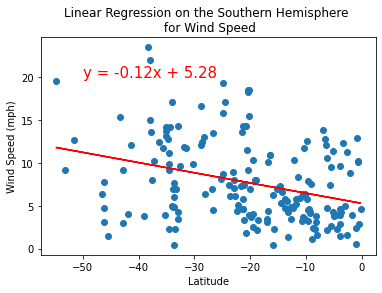

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))